In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
from scipy.signal import lfilter
from scipy import signal
import scipy
import math
from iir_biquad import iir_biquad as iir_biquad_patrick
from iir_biquad import test as test_patrick
from IIRSim import *
from FrequencyResponse import *


In [32]:
notch_freq = 395
b, a = signal.iirnotch(notch_freq, 2, 3000)
pole = signal.tf2zpk(b,a)[1][0]
zero = signal.tf2zpk(b,a)[0][0]
pmag=np.abs(pole)
pangle=np.angle(pole)
zmag=np.abs(zero)
zangle=np.angle(zero)
print(pmag, pangle)

0.8081683126691569 0.8061434976591624


<Figure size 640x480 with 0 Axes>

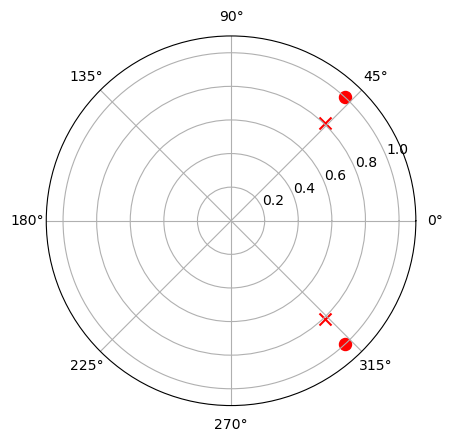

In [33]:
plot_filter_polezero(zmag, zangle, pmag, pangle)

0.6195676194213313 1.6878003090962692


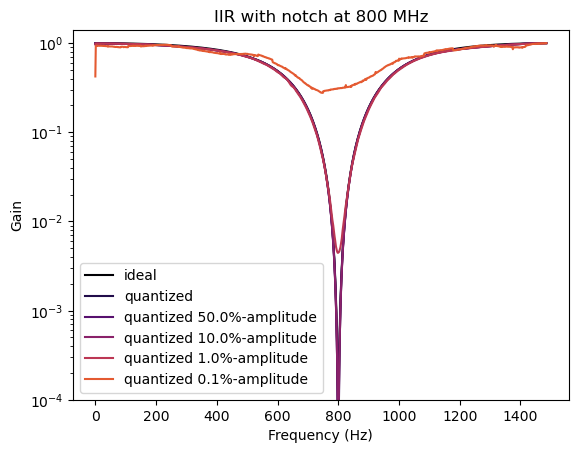

0.6171412191204078 1.6997401948311286


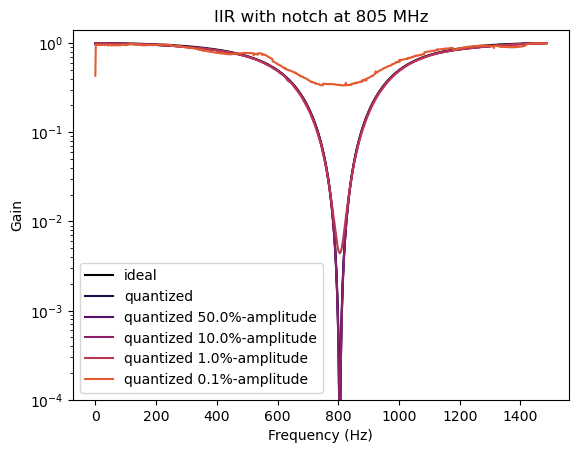

0.6147101038504418 1.7117291949634934


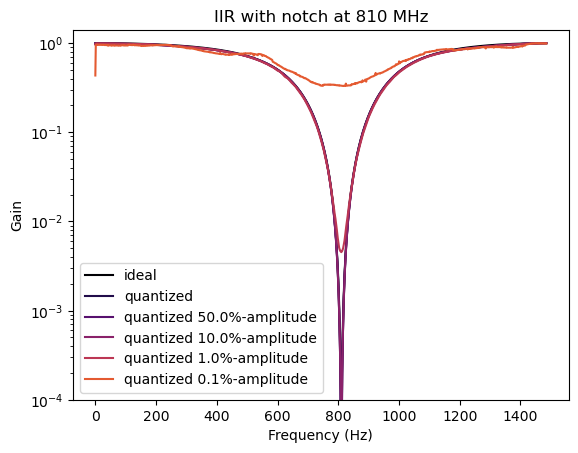

0.6122741694487117 1.7237688926906354


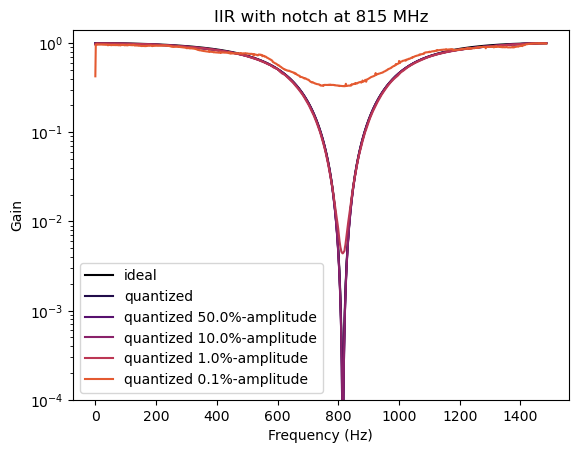

0.6098333102987056 1.7358609388381605


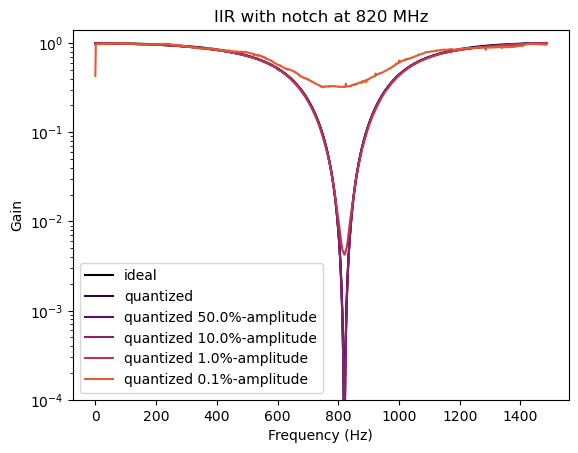

0.6073874192884036 1.7480070556558795


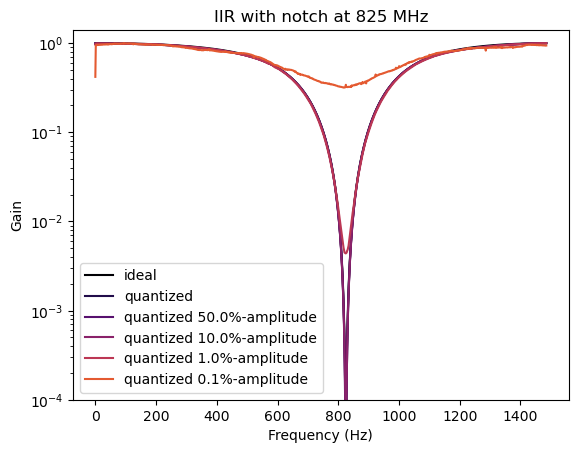

0.6049363877672305 1.7602090408843858


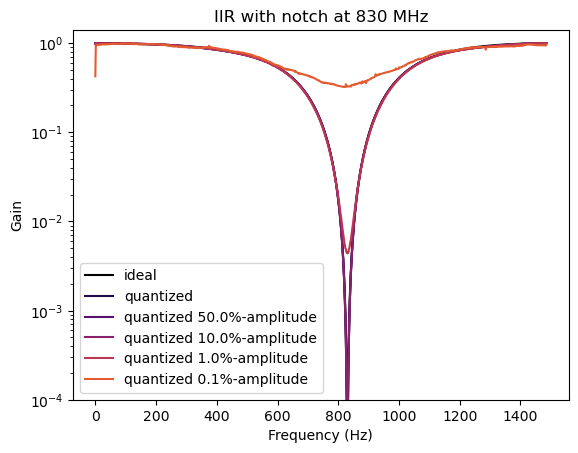

0.6024801055016189 1.772468772116145


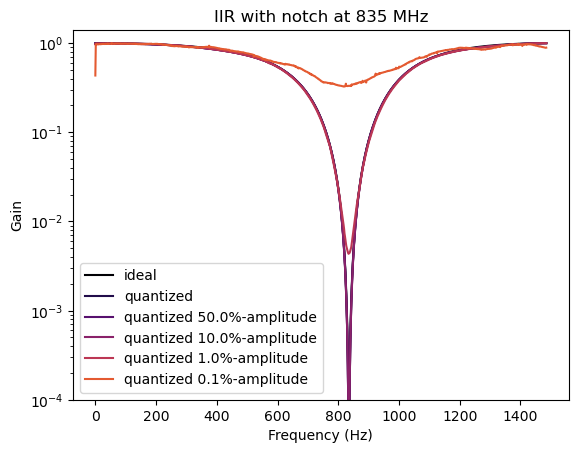

0.6000184606291346 1.7847882114774145


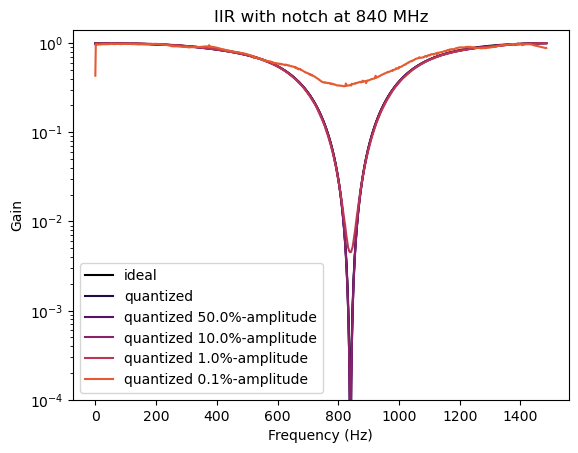

0.597551339611088 1.7971694106601381


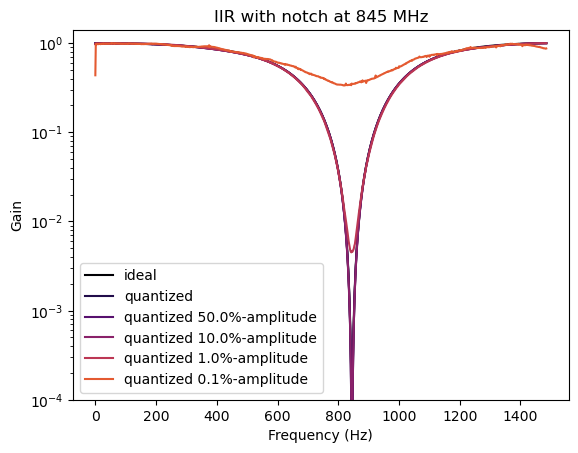

0.5950786271835834 1.8096145163361448


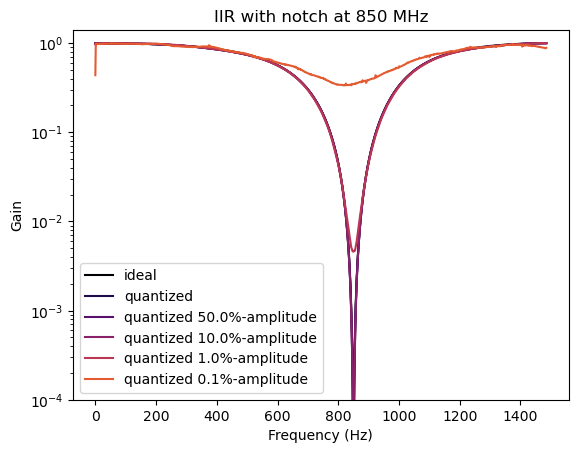

0.5926002063069277 1.8221257759895595


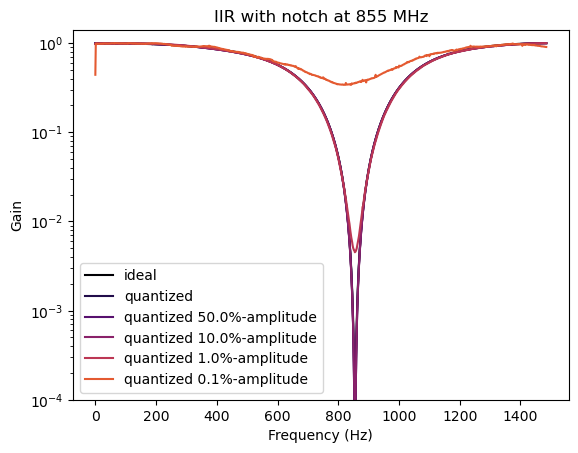

0.5901159581133363 1.8347055442073994


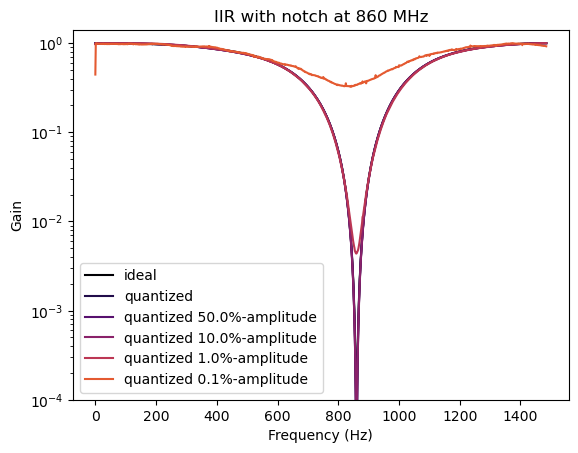

0.5876257618528519 1.8473562894729239


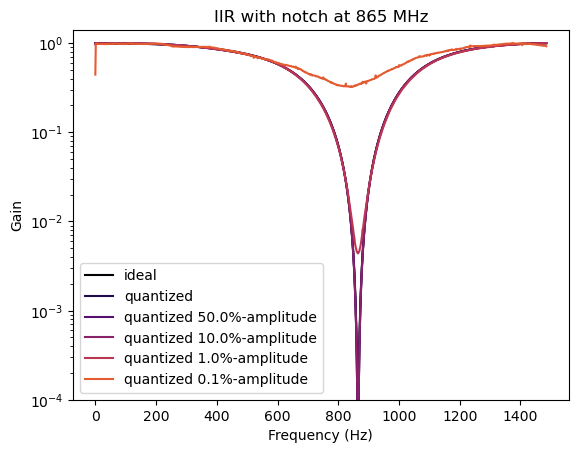

0.5851294948374103 1.8600806015115254


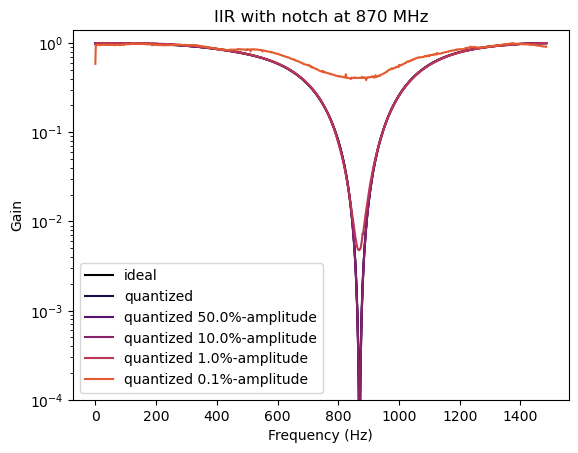

0.5826270323829609 1.8728811992448746


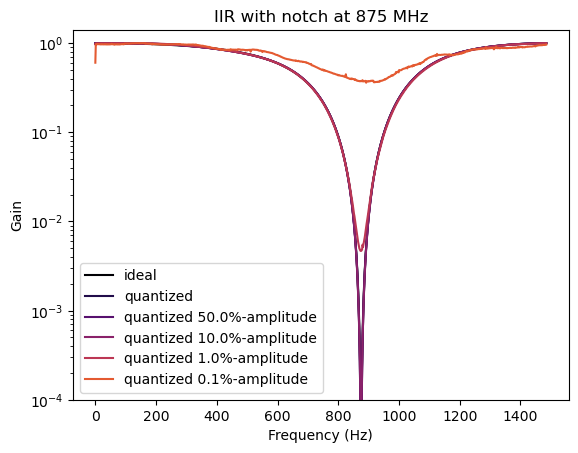

0.5801182477495628 1.8857609394158195


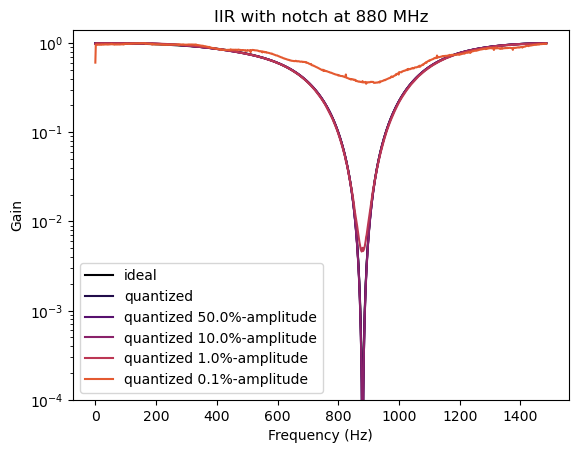

0.5776030120793618 1.8987228259542719


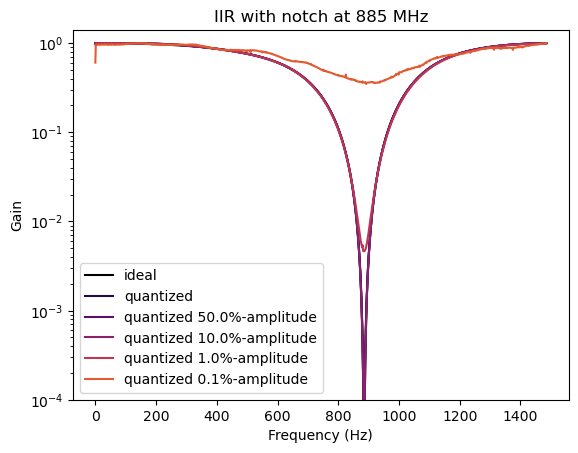

0.5750811943323548 1.9117700201631713


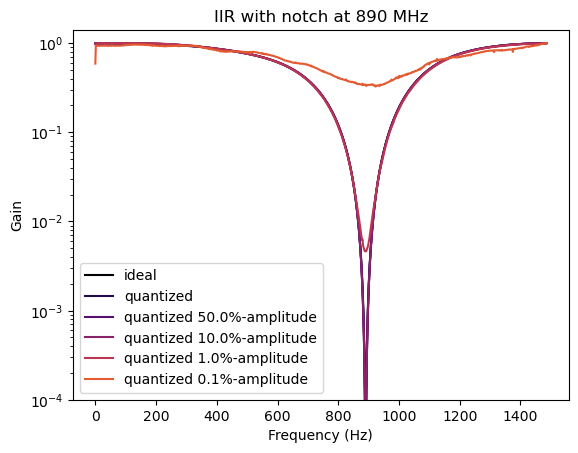

0.5725526612198392 1.9249058518138231


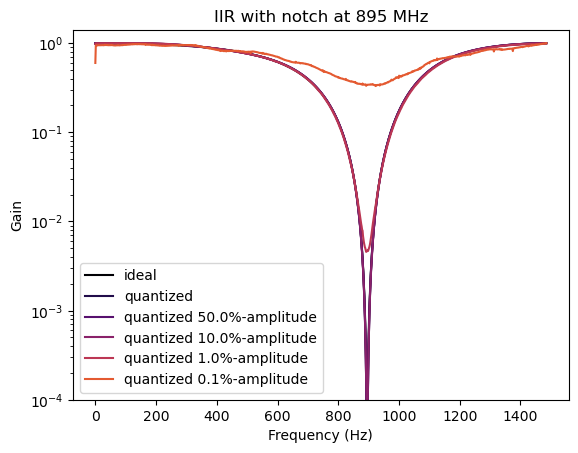

0.5700172771354447 1.9381338312516372


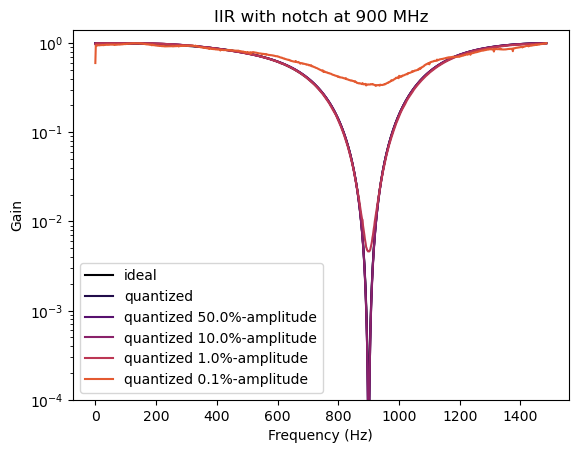

0.5674749040836312 1.9514576626268412


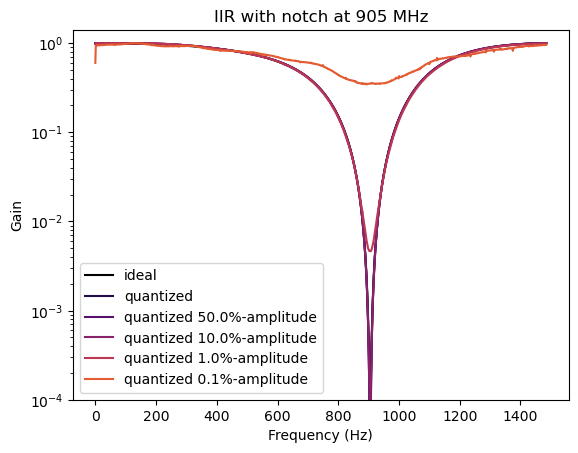

0.5649254016055397 1.9648812583804567


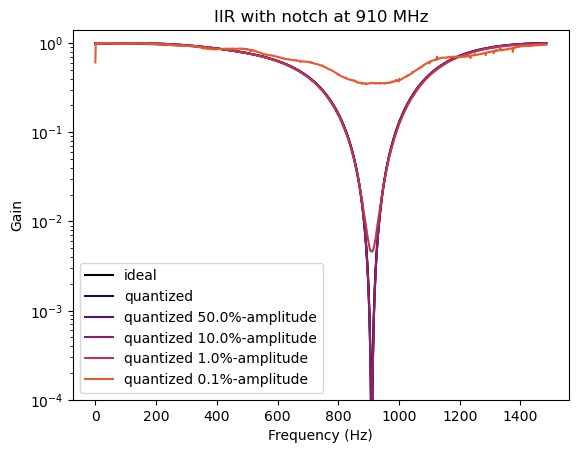

0.5623686267020681 1.9784087551340723


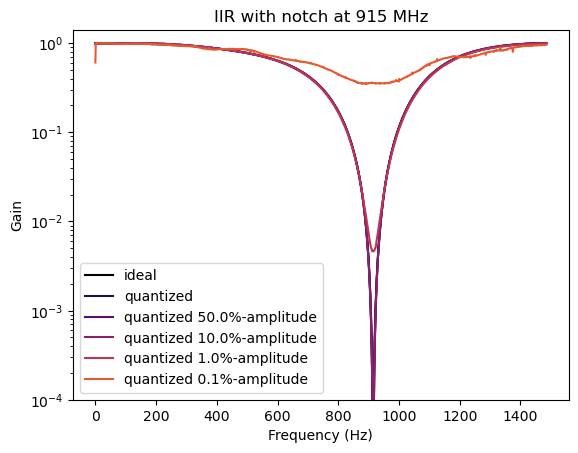

0.5598044337540435 1.992044531153196


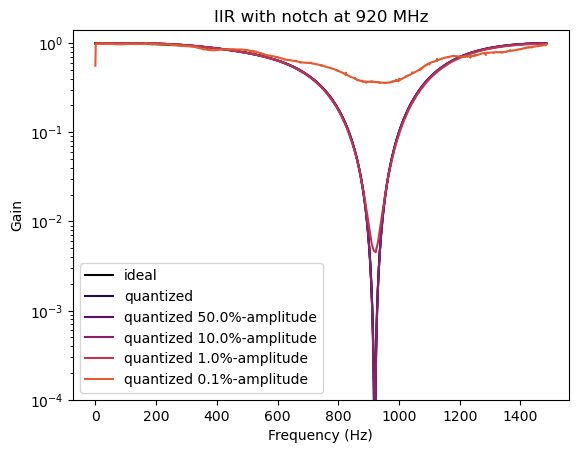

0.5572326744393502 2.0057932255788473


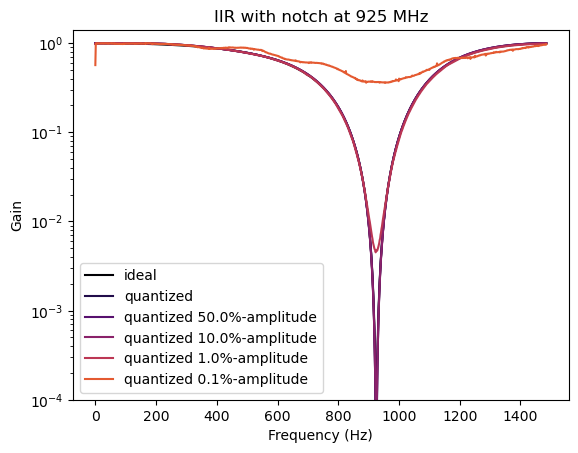

0.5546531976468705 2.0196597596512027


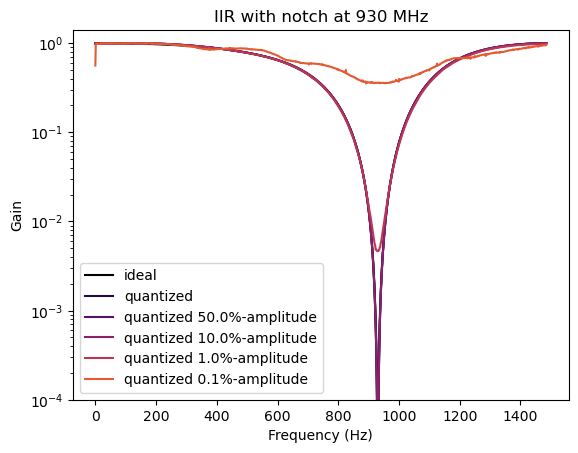

0.5520658493870774 2.0336493601834507


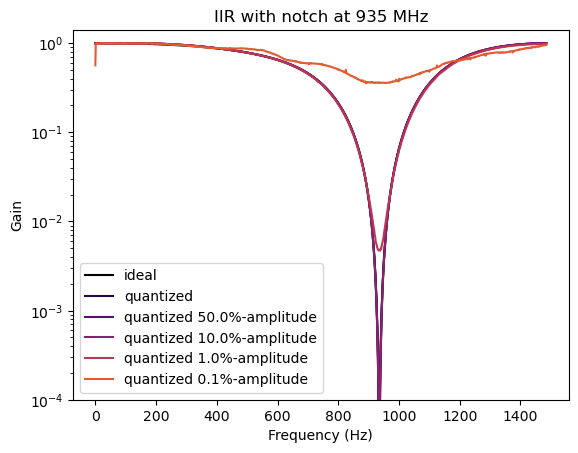

0.5494704726991242 2.0477675855845807


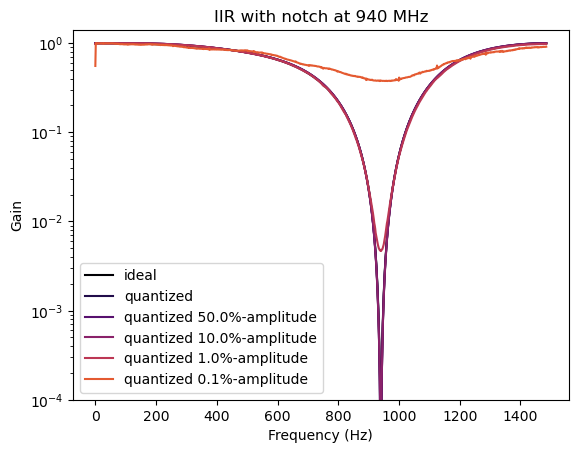

0.5468669075542513 2.0620203547779496


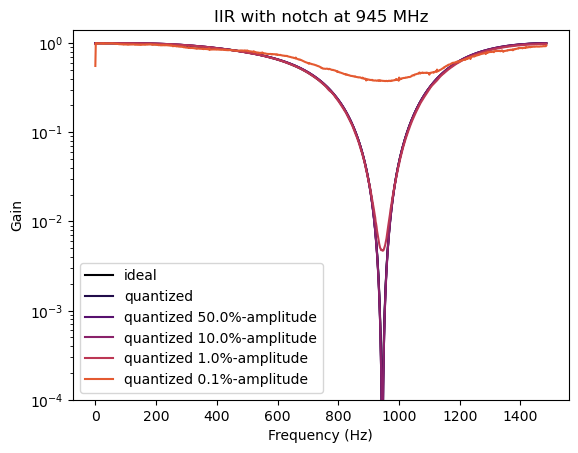

0.5442549907553261 2.0764139794198044


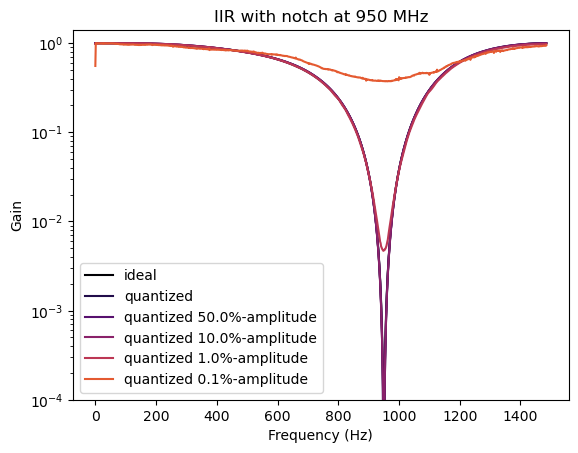

0.5416345558323306 2.0909551998904434


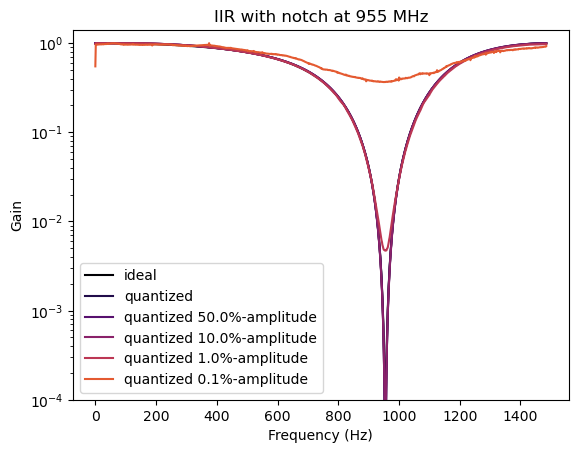

0.5390054329335803 2.1056512256130917


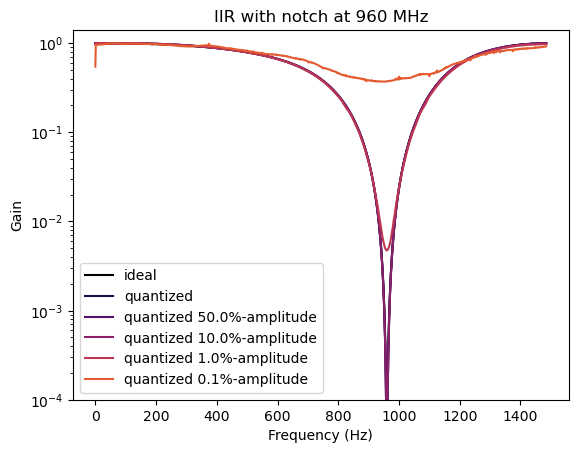

0.5363674487124648 2.1205097803548933


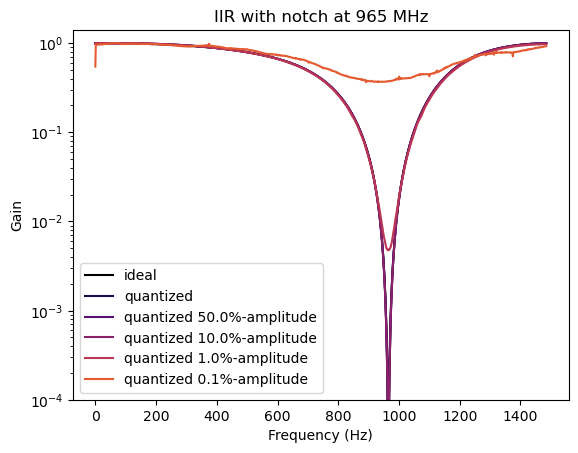

0.5337204262094726 2.1355391532849874


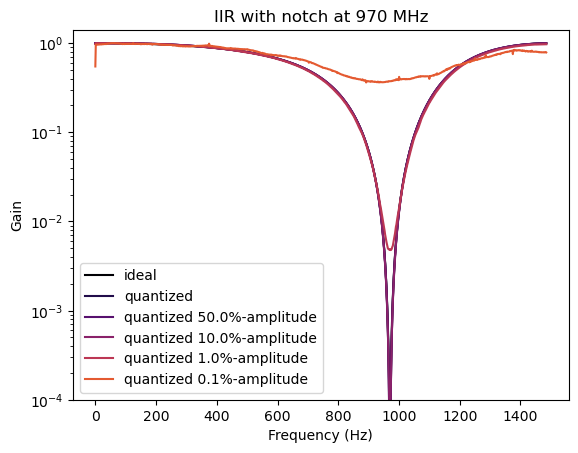

0.5310641847292593 2.1507482567115144


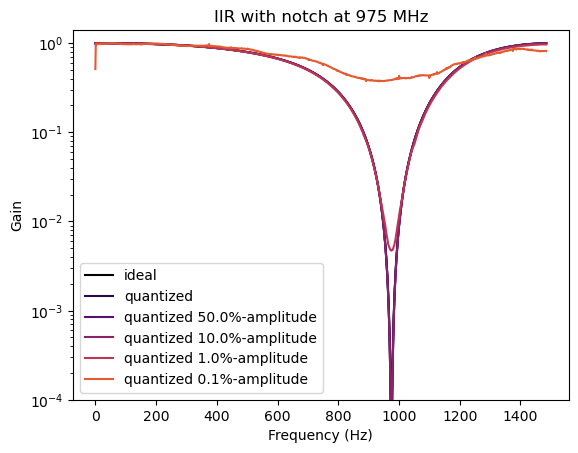

0.528398539712498 2.166146691599516


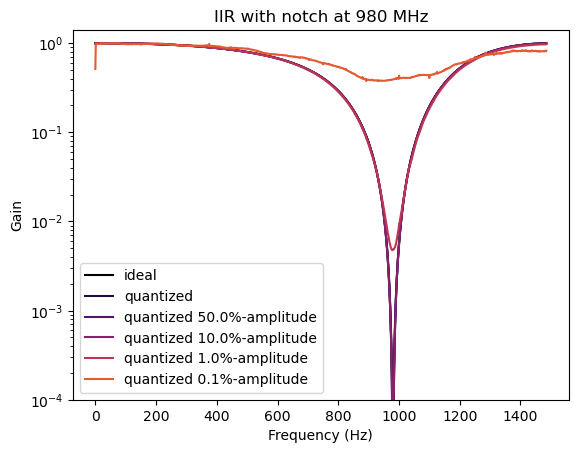

0.5257233026022284 2.181744822193665


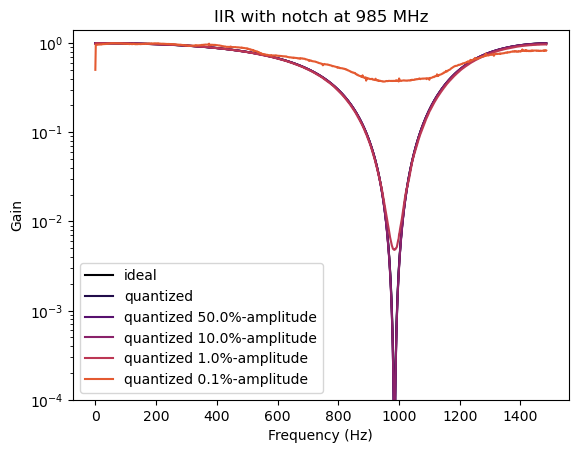

0.5230382807044214 2.1975538613450776


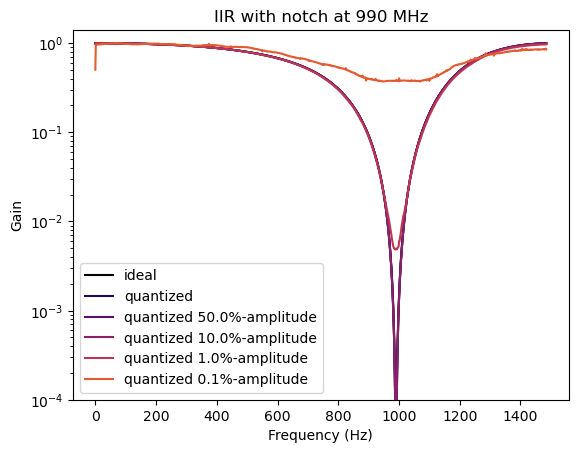

0.5203432770424363 2.213585968485155


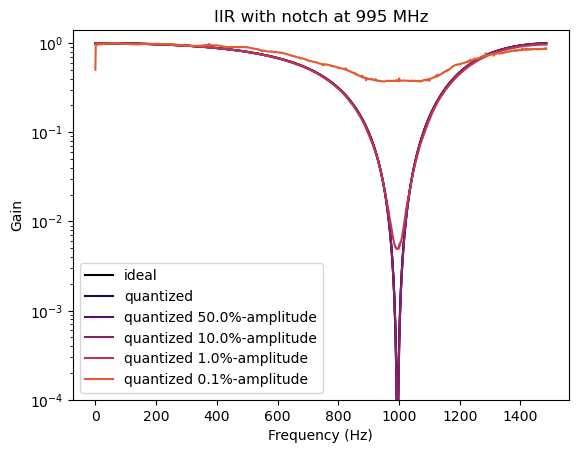

0.5176380902050416 2.229854362621305


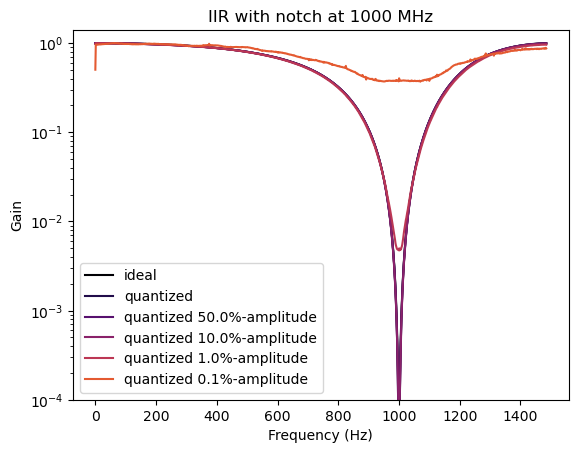

0.514922514187642 2.246373453276211


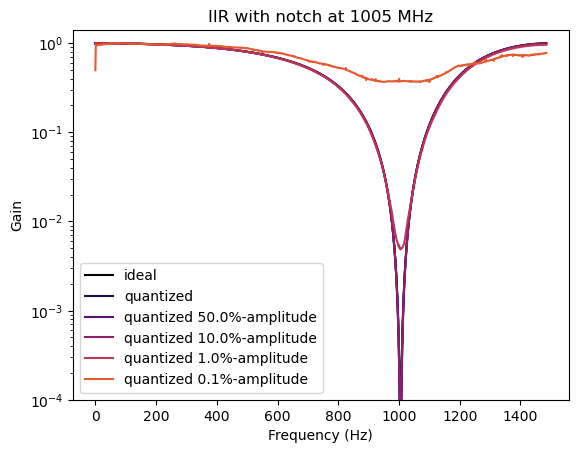

0.512196338226337 2.2631589929899087


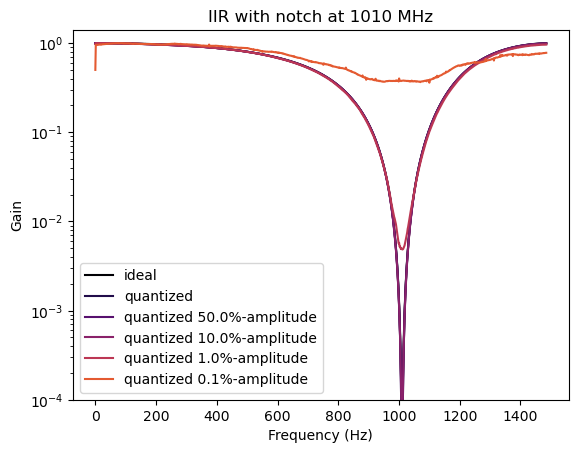

0.5094593466244033 2.2802282559013585


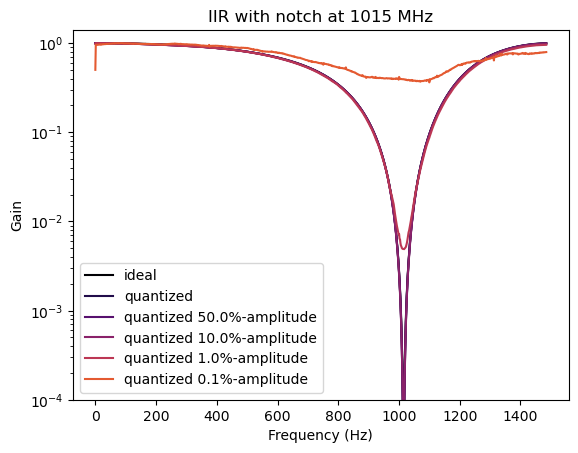

0.5067113185707682 2.297600248090814


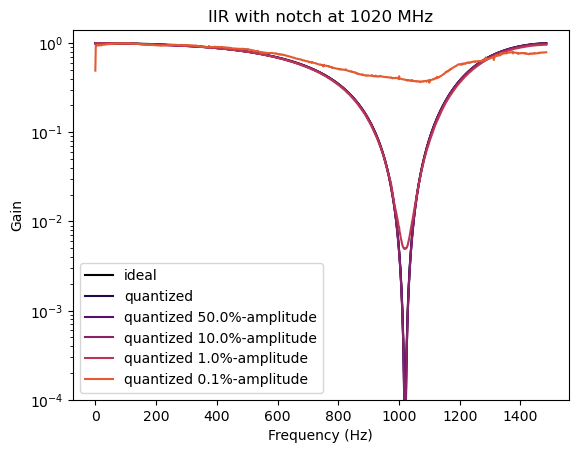

0.5039520279500258 2.3152959568902585


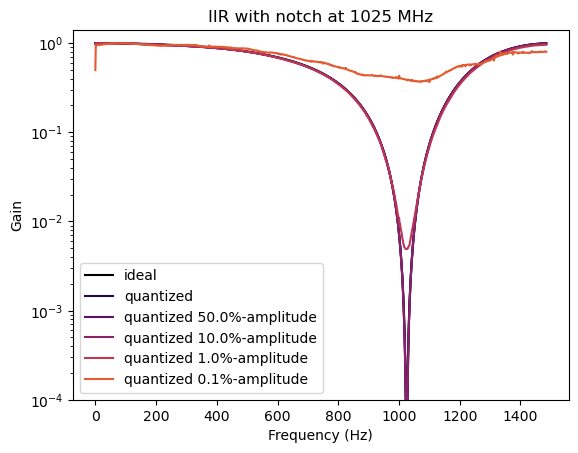

0.5011812431434863 2.3333386483889953


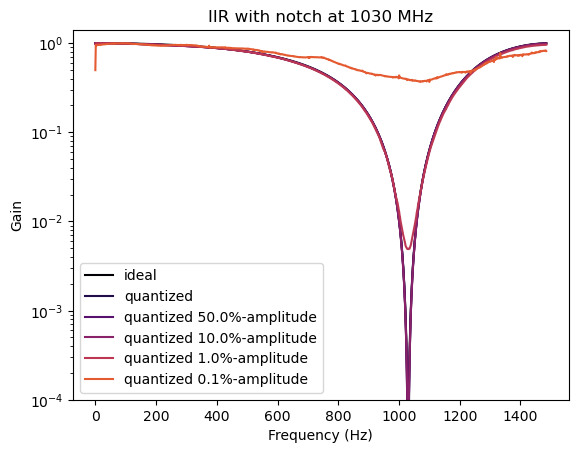

0.49839872682074976 2.3517542250646244


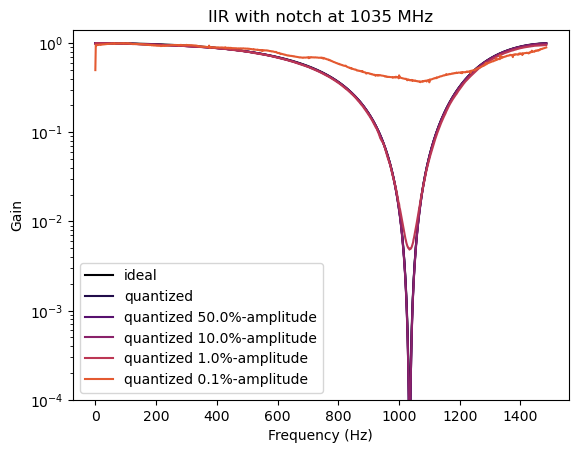

0.4956042357212311 2.3705716591308312


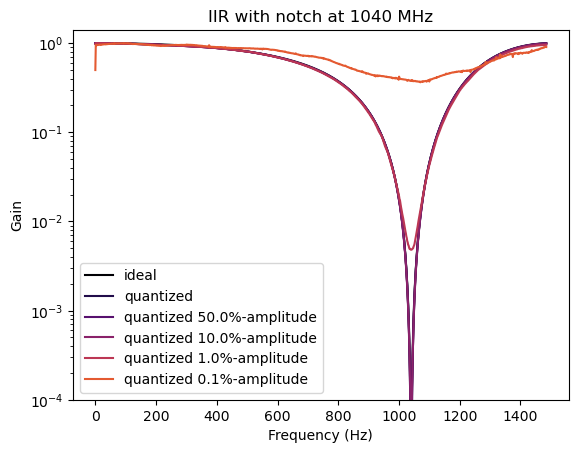

0.4927975204250405 2.389823522216658


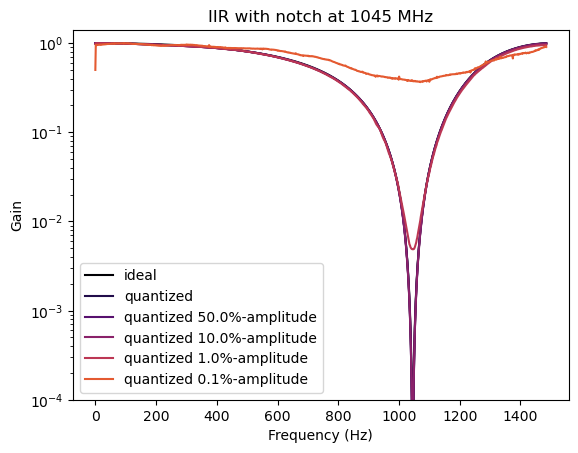

0.48997832511256667 2.4095466389822033


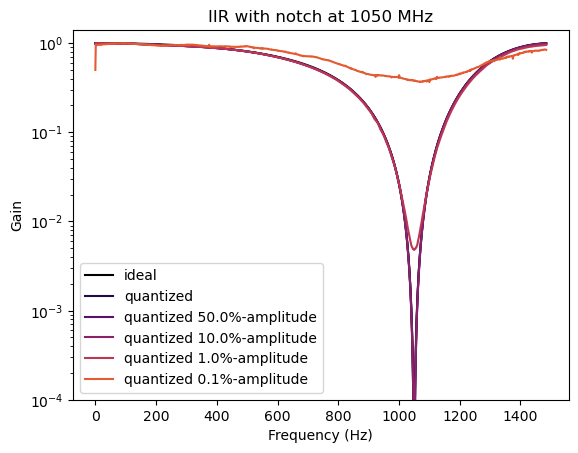

0.4871463873120807 2.429782902154507


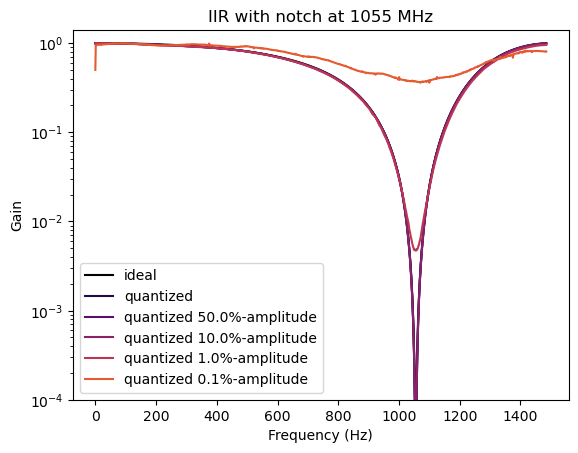

0.4843014376346094 2.45058030066778


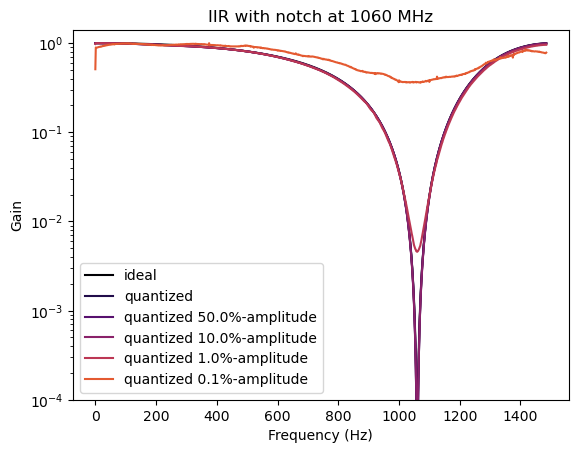

0.4814431994952827 2.4719942333911207


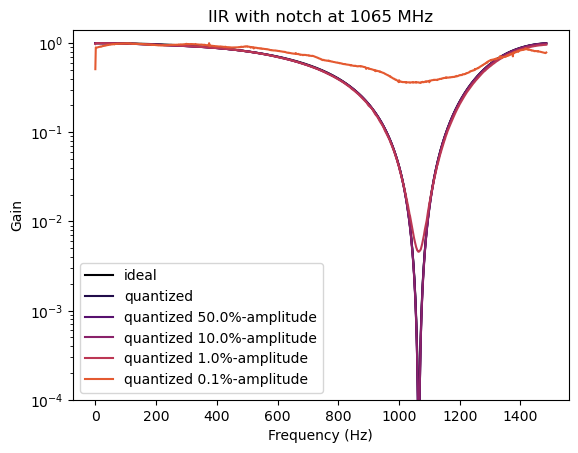

0.4785713888203018 2.494089212032222


In [ ]:
notch_freq = 395
for notch_freq in range(800,1500,5):
    plt.clf()
    b, a = signal.iirnotch(notch_freq, 2, 3000)
    pole = signal.tf2zpk(b,a)[1][0]
    zero = signal.tf2zpk(b,a)[0][0]
    pmag=np.abs(pole)
    pangle=np.angle(pole)
    zmag=np.abs(zero)
    zangle=np.angle(zero)
    print(pmag, pangle)
    samples = 1000
    sample_freqs =  np.linspace(0,0.99,samples)
    freq_response = eval_biquad_filter_DFT(zmag, zangle, pmag, pangle, sample_freqs)
    freq_response_quantized = eval_biquad_quantized_DFT(b, a, sample_freqs, internal_samples=8*1000, amplitude=False, phase=0)
    
    freq_response_quantized_0p5 = eval_biquad_quantized_DFT(b, a, sample_freqs, internal_samples=8*1000, amplitude=False, phase=0, in_amplitude=0.5)
    
    freq_response_quantized_0p1 = eval_biquad_quantized_DFT(b, a, sample_freqs, internal_samples=8*1000, amplitude=False, phase=0, in_amplitude=0.1)
    
    freq_response_quantized_0p01 = eval_biquad_quantized_DFT(b, a, sample_freqs, internal_samples=8*1000, amplitude=False, phase=0, in_amplitude=0.01)
    
    freq_response_quantized_0p001 = eval_biquad_quantized_DFT(b, a, sample_freqs, internal_samples=8*1000, amplitude=False, phase=0, in_amplitude=0.001)
    
    # freq_response_quantized_smalln = eval_biquad_quantized_DFT(b, a, sample_freqs, internal_samples=8*100, amplitude=False, phase=0)
    
    cmap = plt.cm.inferno#plasma
    norm = matplotlib.colors.Normalize(vmin=0, vmax=8)
    #=cmap(norm(df.c.values))
    
    sample_freqs_scaled = sample_freqs * 1500
    plt.semilogy(sample_freqs_scaled,freq_response, label="ideal", color = cmap(norm(0)))
    plt.semilogy(sample_freqs_scaled,freq_response_quantized, label="quantized", color = cmap(norm(1)))
    # plt.semilogy(sample_freqs_scaled,freq_response_quantized_smalln, label="quantized small n")
    plt.semilogy(sample_freqs_scaled,freq_response_quantized_0p5, label="quantized 50.0%-amplitude", color = cmap(norm(2)))
    plt.semilogy(sample_freqs_scaled,freq_response_quantized_0p1, label="quantized 10.0%-amplitude", color = cmap(norm(3)))
    plt.semilogy(sample_freqs_scaled,freq_response_quantized_0p01, label="quantized 1.0%-amplitude", color = cmap(norm(4)))
    plt.semilogy(sample_freqs_scaled,freq_response_quantized_0p001, label="quantized 0.1%-amplitude", color = cmap(norm(5)))
    plt.legend()
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Gain")
    plt.ylim(0.0001,1.4)
    plt.title("IIR with notch at %s MHz"%(notch_freq))
    # plt.xlim(700,800)
    plt.savefig("freqResponseNotch%sMHz.png"%(notch_freq))
    plt.show()